# Colormaps

Any colormap made here should be able to applied to any of the surface stuff that is applied throughout dag_prf_utils

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use any colormap specified in (https://matplotlib.org/stable/tutorials/colors/colormaps.html)

I also have a function which allows you to use a color picker to work out a nice custom colormap, and then save it. 
In bash try running:
> dag_cmap_maker --vmin -3.14 --vmax 3.14 --n_steps 9 


You will see a plot with a random colormap. You can click on any of the points in the rgb graph, and move them around. When you are happy, close the window, and you will see the option to save the colormap in the bash terminal. This will put everything into a .json (cmaps.json). This toolbox will be able to reconstruct this anytime you want. (using dag_get_cmap)

This example could help you make a custom polar angle map. 

Also see below how you can create your own custom colormap from lists of colors. (using matplotlib stuff - this is just to try and speed things up)

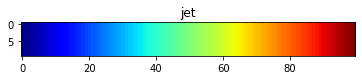

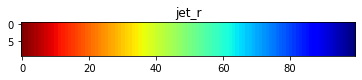

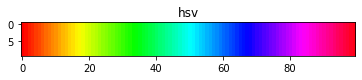

In [1]:
from dag_prf_utils.plot_functions import *

demo_mat = np.ones((10,100)) * np.arange(100)
# You can load any of the defualt colormaps that exist in matplotlib
eg_default_cmaps = {}
eg_default_cmaps['jet'] = dag_get_cmap('jet')
eg_default_cmaps['jet_r'] = dag_get_cmap('jet_r')
eg_default_cmaps['hsv'] = dag_get_cmap('hsv')

for eg_cmap in ['jet', 'jet_r', 'hsv']:
    plt.figure()
    plt.imshow(demo_mat, cmap=eg_default_cmaps[eg_cmap])
    plt.title(eg_cmap)


Text(0.5, 1.0, 'Squish and stretch the cmap using col_steps')

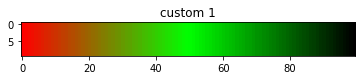

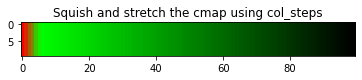

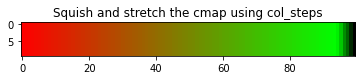

In [2]:
# To create a custom color map:
# [1] cmap_name             name of your new cmap
# [2] col_list              list of colors (any length, just doing 3 here to keep it simple)
# [3] (optional) col_steps  list of numbers (how to space the list of colors...)

cmap_name = 'custom_cmap1'
col_list = [
    (255,0,0),
    (0,255,0),
    (0, 0, 0)
]

# Put this together in a dictionary:
cmap1 = dag_get_cmap(
    cmap_name=cmap_name,
    col_list=col_list,
)
plt.figure()
plt.imshow(demo_mat, cmap=cmap1)
plt.title('custom 1')


# You can also specify the spacing of the colors using a third component: col_steps
cmap2 = dag_get_cmap(
    cmap_name=cmap_name,
    col_list=col_list,
    col_steps=[0,.1,2]    
)
plt.figure()
plt.imshow(demo_mat, cmap=cmap2)
plt.title('Squish and stretch the cmap using col_steps')


# Nonlinear spacing
cmap3 = dag_get_cmap(
    cmap_name=cmap_name,
    col_list=col_list,
    col_steps=[0,1.9,2]    
)
plt.figure()
plt.imshow(demo_mat, cmap=cmap3)
plt.title('Squish and stretch the cmap using col_steps')

(1.0, 0.0, 0.0)
(0.0, 0.0, 1.0)
(0.0, 0.75, 0.75)
(1.0, 0.0, 0.0)
(0.0, 1.0, 1.0)
(0.0, 0.5019607843137255, 0.0)
(0.10588235294117647, 0.6196078431372549, 0.4666666666666667)
(0.8509803921568627, 0.37254901960784315, 0.00784313725490196)
(0.4588235294117647, 0.4392156862745098, 0.7019607843137254)


Text(0.5, 1.0, 'Using HEX colors')

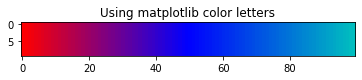

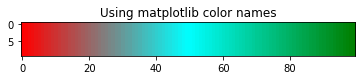

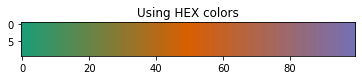

In [3]:
# This also supports a variety of ways of defining colors:
cmap = dag_get_cmap(
    cmap_name='blah',
    col_list = ['r', 'b', 'c'],
)
plt.figure()
plt.imshow(demo_mat, cmap=cmap)
plt.title('Using matplotlib color letters')


cmap = dag_get_cmap(
    cmap_name='blah',
    col_list = ['red', 'cyan', 'green'],)
plt.figure()
plt.imshow(demo_mat, cmap=cmap)
plt.title('Using matplotlib color names')

cmap = dag_get_cmap(
    cmap_name='blah',
    col_list = ['#1b9e77','#d95f02','#7570b3'])
plt.figure()
plt.imshow(demo_mat, cmap=cmap)
plt.title('Using HEX colors')



(1.0, 0.0, 0.0)
(0.0, 0.0, 1.0)
(0.0, 0.5, 0.0)
saving cmap temp
saving cmap temp
saving cmap temp


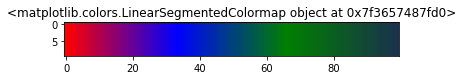

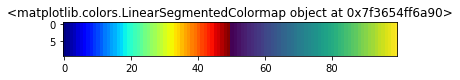

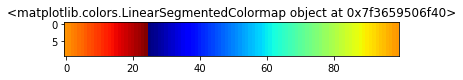

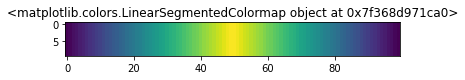

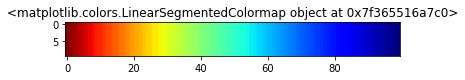

In [4]:
# We can also create a custom color map using strings 
eg_cmaps = []
eg_cmaps.append(
    dag_cmap_from_str('r*b*g*(0.1,0.2,0.3)') # color map by stacking colors
)

eg_cmaps.append(
    dag_cmap_from_str('jet&viridis') # stack 2 cmaps on top of each other
)

eg_cmaps.append(
    dag_cmap_from_str('jet_rot90') # rotate a cmap
)

eg_cmaps.append(
    dag_cmap_from_str('viridis&viridis_r') # stack 2 cmaps on top of each other, reverse one
)

eg_cmaps.append(
    dag_cmap_from_str('jet_log__rev_') # log spacing + reversed
)
# ... etc
for eg_cmap in eg_cmaps:
    plt.figure()
    plt.imshow(demo_mat, cmap=eg_cmap)
    plt.title(eg_cmap)

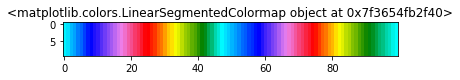

In [7]:
# We can also create a custom color map using strings 
from dag_prf_utils.plot_functions import *
eg_cmaps = []
eg_cmaps.append(
    dag_cmap_from_str('marco_pol_rot90') # color map by stacking colors
)
# ... etc
for eg_cmap in eg_cmaps:
    plt.figure()
    plt.imshow(demo_mat, cmap=eg_cmap)
    plt.title(eg_cmap)

marco_pol exists
jet_r exists


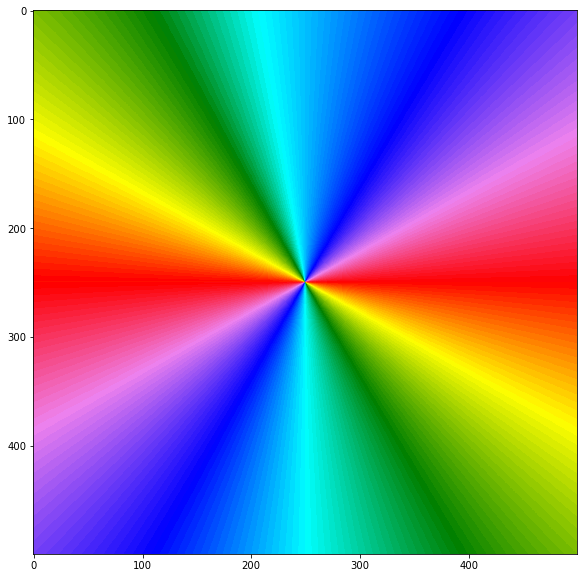

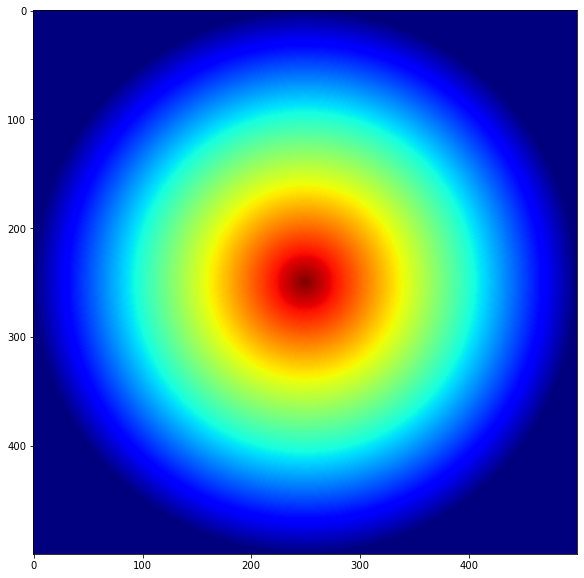

In [8]:
x,y = np.meshgrid(np.linspace(-5.34,5.34,500), np.linspace(-5.34,5.34,500))
pol = np.arctan2(y,x)
ecc = np.sqrt(x**2 + y**2)
plt.figure(figsize=(10,10))
plt.imshow(pol, cmap=dag_cmap_from_str('marco_pol'), vmin=-np.pi, vmax=np.pi)
plt.savefig('marco_pol.pdf')

plt.figure(figsize=(10,10))
plt.imshow(ecc, cmap=dag_cmap_from_str('jet_r'), vmin=0, vmax=5.34)
plt.savefig('ecc_jet_r.pdf')


(1.0, 0.0, 0.0)
(0.0, 0.5, 0.0)
(0.0, 0.0, 1.0)
saving cmap temp
saving cmap temp


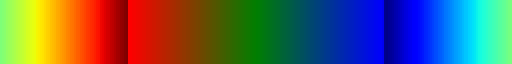

In [ ]:
dag_cmap_from_str('r*g*b&jet_rot90') 
# Ok officially this is getting out of hand.
# I'm going to stop here.